# Project Title

## Overview

   Our company is making the venture into the airline industry. We have been tasked with determining which aircraft our company should purchase. In this notebook, we have analyzed a large dataset on aircraft accidents in order to provide three recommendations in that vein.

## Business Understanding

   The airline business notoriously walks a fine line between risk and profit. Each company must answer to two main stakeholders: their shareholders and their passengers. The former demands profit maximization and cost minimization, and the latter deserves safe, speedy flights.
   
   We believe that these two goals work hand-in-hand: by providing customers safe, high-quality aircraft to fly in, we reduce the risk of expensive accidents, increasing our profits.

## Data Understanding

The dataset we will be using can be accessed here: [Aviation Accident Database 1948-2022](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses). It is publicly available through the [kaggle](https://www.kaggle.com/) database. 

This dataset is provided by the National Transportation Safety Board, an independent government body which enforces aeronautics safety guidelines, investigates incidents, advocates for victims, and more.

The NTSB has compiled this cumulative file containing over 90,000 individual records of different types of aircraft accidents from the years 1948-2022. Each row represents one accident and each column (of which there are 31) represents a detail about said accident. 

Our goal in this project is to discover the airplane types with the lowest fatalities and damage, as these will also minimize the cost of doing business. Thus, this dataset is extremely relevant to our business question.

In this section we will explore the full dataset so that we can later decide which specific data is most relevant to our research. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Final_Data/Aviation_Data.csv', parse_dates=['Event.Date', 'Publication.Date'])
df.head()

/Users/shelleywang/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [4]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,2022-12-29
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,2022-12-27
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,2022-12-30


In [5]:
df.shape

(90348, 31)

In [6]:
df.describe(datetime_is_numeric=True)

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Publication.Date
count,88889,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000,73659
mean,1999-09-17 17:13:39.354475904,1.146585,0.647855,0.279881,0.357061,5.325440,2004-05-01 19:38:20.932676224
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1980-04-16 00:00:00
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1993-09-14 00:00:00
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,2001-10-07 00:00:00
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2020-09-25 00:00:00
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,2022-12-30 00:00:00
std,NaN,0.446510,5.485960,1.544084,2.235625,27.913634,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [8]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

Below, we explore columns that we may want to drop. Taking a value count shows us the unique data points in that column, elucidating what that column is describing.

In [9]:
df['Air.carrier'].value_counts()

Pilot                                258
American Airlines                     90
United Airlines                       89
Delta Air Lines                       53
SOUTHWEST AIRLINES CO                 42
                                    ... 
Philippe F Camus                       1
Southern Helicopter Service LLC        1
Robert Dawson                          1
PALM BEACH COUNTY SHERIFFS OFFICE      1
Executive Aviation                     1
Name: Air.carrier, Length: 13590, dtype: int64

In [10]:
df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [11]:
df['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
125                                   5
Part 125: 20+ Pax,6000+ lbs           5
107                                   4


In [12]:
df['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [13]:
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                      61754
Foreign                                                                                                                                                                                                                              1999
<br /><br />                                                                                                                                                                                                                          167
Factual                                                                                                                                                                                                                               145
The pilot's failure to maintain directional control during the l

## Data Preparation

Now that we've explored the full dataset, we will remove data that is unecessary to our search for the best airplanes. In other words, we will shave down the NTSB file and save that new chunk of data for our later analysis. 

### Making a Subset by Dropping Columns and Rows

First we will define our subset as a colleciton of relevant columns from the full NTSB dataset. Below you will see that we have dropped 16 of the original 31 columns. 

We dropped 'Event.Id', 'Accident.Number', and 'Registration.Number" because these are unique identifying number-letter strings. We have an Index column where each row is numbered. This makes these two columns redundant.

We dropped 'Investigation Type', 'Report.Status', and 'Publication.Date' because these details are only relevant to the procedural investigation of each accident, not the aircraft qualities.

We dropped 'Latitude', 'Longitude', 'Airport.Code', and 'Airport.Name' because we will be keeping the 'Location' and 'Country' columns as our chosen geographical data. These dropped columns are highly specific and therefore less workable for our purposes. 

The 'FAR.Description', 'Schedule', and 'Purpose.of.flight' columns provide data regarding the type of each trip, which is not relevant to our exploration of airplane qualities. The FAR description column identifies the rulebook under which the pilot flew, the purpose of flight column is about why each trip was taken, and the schedule column is over 80% nulls.

We dropped "Air.Carrier" because we are not interested in the performance of specific airlines and because it is also over 80% null values.

We dropped "Broad.phase.of.flight" because the stage of the trip that the plane was in has no relevance to our question on the performance of different types of planes. However, please see our Next Steps section for suggestions on how this data can be used in the future.

In [14]:
df_subset = df[['Event.Date', 'Location', 'Country', 'Number.of.Engines',
                'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model', 
                'Amateur.Built', 'Engine.Type',
                'Total.Fatal.Injuries', 'Total.Minor.Injuries', 
                'Total.Uninjured', 'Total.Serious.Injuries', 
                'Weather.Condition']]


In [15]:
# Standardizing the formatting of the column names

df_subset = df_subset.rename(columns = lambda x: x.lower())

Our company is interested in purchasing airplanes. Below we keep only accidents involving airplanes.

In [16]:
# Keeping only airplanes

df_subset = df_subset.loc[df_subset['aircraft.category'] == 'Airplane']

In [17]:
# Dropping the 'aircraft.category' column

df_subset = df_subset.drop(columns=['aircraft.category'])

Our company is highly unlikely to purchase planes built by amateurs. This is an unsafe and an unheard of business practice. 

In [18]:
# Keeping only non-amateur built airplanes

df_subset = df_subset.loc[df_subset['amateur.built'] == 'No']

In [19]:
# Dropping the 'amateur.built' column

df_subset = df_subset.drop(columns=['amateur.built'])

We may be interested in exploring the incident of accidents over the years. Our 'event.date' column contains month, day, and year. We will strip the month and day below.

In [20]:
# Keeping only the year (first 4 characters) from the 'event.date' column

df_subset = df_subset.rename(columns = lambda x: x.lower())
df_subset['event.date'] = pd.to_datetime(df_subset['event.date']).dt.year


The location data is highly specific, including town and state. We would like to only keep data on the state an accident occurred in, so that we can aggregate regional data (50 categories) instead of having thousands of individual town-level data. 

In [21]:
# Keeping only the state abbreviations from 'location' column into a new column

df_subset['state'] = df_subset['location'].str.split(",").str[1]


In [22]:
# Dropping the 'location' column

df_subset = df_subset.drop(columns=['location'])

Here we check whether any values from the 'weather.condition' column need to be cleaned. 

In [23]:
# Exploring the 'weather.condition' column

df_subset['weather.condition'].value_counts()

VMC    19711
IMC     1363
Unk      215
UNK      149
Name: weather.condition, dtype: int64

In [24]:
# Cleaning typos from weather.condition

replace_dict = {'Unk':'UNK'}
df_subset['weather.condition'] = df_subset['weather.condition'].replace(replace_dict)
df_subset['weather.condition'].value_counts()

VMC    19711
IMC     1363
UNK      364
Name: weather.condition, dtype: int64

Here we check whether any values from the 'engine.type' column need to be cleaned. 

In [25]:
# Exploring the 'engine.type' column

df_subset['engine.type'].value_counts()

Reciprocating      17846
Turbo Prop          1332
Turbo Fan            967
Turbo Jet            153
Unknown              134
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: engine.type, dtype: int64

In [26]:
# Cleaning typos from engine.type

replace_dict3 = {'UNK':'Unknown'}
df_subset['engine.type'] = df_subset['engine.type'].replace(replace_dict3)
df_subset['engine.type'].value_counts()

Reciprocating      17846
Turbo Prop          1332
Turbo Fan            967
Turbo Jet            153
Unknown              135
Geared Turbofan       12
Turbo Shaft           11
Electric               5
Name: engine.type, dtype: int64

After having dropped unecessary info and cleaned redundant values, we re-run exploratory code to understand our new data set.

In [27]:
df_subset.head()

,event.date,country,number.of.engines,aircraft.damage,make,model,engine.type,total.fatal.injuries,total.minor.injuries,total.uninjured,total.serious.injuries,weather.condition,state
5,1979,United States,2.0,Substantial,Mcdonnell Douglas,DC9,Turbo Fan,NaN,1.0,44.0,NaN,VMC,MA
7,1982,United States,1.0,Substantial,Cessna,140,Reciprocating,0.0,0.0,2.0,0.0,VMC,WA
8,1982,United States,2.0,Substantial,Cessna,401B,Reciprocating,0.0,0.0,2.0,0.0,IMC,NJ
12,1982,United States,1.0,Destroyed,Bellanca,17-30A,Reciprocating,0.0,1.0,0.0,0.0,IMC,LA
13,1982,United States,1.0,Destroyed,Cessna,R172K,Reciprocating,1.0,0.0,0.0,0.0,IMC,TX


In [28]:
df_subset.shape

(24417, 13)

In [29]:
df_subset.describe()

,event.date,number.of.engines,total.fatal.injuries,total.minor.injuries,total.uninjured,total.serious.injuries
count,24417.000000,21866.000000,21651.000000,21855.000000,23699.000000,21571.000000
mean,2009.465332,1.178542,0.692301,0.237795,7.072071,0.304112
std,11.509243,0.428836,6.305217,1.689566,33.701013,2.222186
min,1979.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2017.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,2022.000000,8.000000,295.000000,200.000000,588.000000,161.000000


In [30]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24417 entries, 5 to 90345
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event.date              24417 non-null  int64  
 1   country                 24410 non-null  object 
 2   number.of.engines       21866 non-null  float64
 3   aircraft.damage         23147 non-null  object 
 4   make                    24414 non-null  object 
 5   model                   24399 non-null  object 
 6   engine.type             20461 non-null  object 
 7   total.fatal.injuries    21651 non-null  float64
 8   total.minor.injuries    21855 non-null  float64
 9   total.uninjured         23699 non-null  float64
 10  total.serious.injuries  21571 non-null  float64
 11  weather.condition       21438 non-null  object 
 12  state                   24393 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 2.6+ MB


### Cleaning Null Values

In [31]:
df_subset.isna().sum()

event.date                   0
country                      7
number.of.engines         2551
aircraft.damage           1270
make                         3
model                       18
engine.type               3956
total.fatal.injuries      2766
total.minor.injuries      2562
total.uninjured            718
total.serious.injuries    2846
weather.condition         2979
state                       24
dtype: int64

First we will drop rows from columns that have fewer than 25 nulls. In a data set of over 24k entries, these are a negligible amount to lose.

In [32]:
# Dropping rows in columns that have very few nulls

df_subset = df_subset.dropna(subset=['country', 'make', 'model', 'state'])
df_subset.isna().sum()

event.date                   0
country                      0
number.of.engines         2540
aircraft.damage           1263
make                         0
model                        0
engine.type               3942
total.fatal.injuries      2752
total.minor.injuries      2545
total.uninjured            709
total.serious.injuries    2828
weather.condition         2968
state                        0
dtype: int64

If no information is available for injuries, we will assume that no injuries were reported. In any accident, damage to or loss of human life is the most paramount piece of information, so it is unlikely that any injury or death occurred without being reported. Thus, we fill these null values with 0's.

In [33]:
# Filling the NaN's in the 4 injuries columns with 0's

df_subset['total.serious.injuries'].fillna(0, inplace=True)
df_subset['total.fatal.injuries'].fillna(0, inplace=True)
df_subset['total.minor.injuries'].fillna(0, inplace=True)
df_subset['total.uninjured'].fillna(0, inplace=True)

df_subset.isna().sum()

event.date                   0
country                      0
number.of.engines         2540
aircraft.damage           1263
make                         0
model                        0
engine.type               3942
total.fatal.injuries         0
total.minor.injuries         0
total.uninjured              0
total.serious.injuries       0
weather.condition         2968
state                        0
dtype: int64

Here we fill null values in the 'aircraft.damage' column with 'N/A', then combine those values with the 'Unknown' category in order to reduce the number of categories. Unknown damage is equivalent to unknown information (a null).

In [34]:
# Replacing nulls in the 'aircraft.damage' column

df_subset['aircraft.damage'].value_counts()
df_subset['aircraft.damage'] = df_subset['aircraft.damage'].fillna('N/A')

In [35]:
# Combining 'Unknown' and 'N/A' values in in the 'aircraft.damage' column

replace_dict1 = {'Unknown':'N/A'}
df_subset['aircraft.damage'] = df_subset['aircraft.damage'].replace(replace_dict1)
df_subset['aircraft.damage'].value_counts()

Substantial    18965
Destroyed       3129
N/A             1360
Minor            920
Name: aircraft.damage, dtype: int64

In [36]:
df_subset.isna().sum()

event.date                   0
country                      0
number.of.engines         2540
aircraft.damage              0
make                         0
model                        0
engine.type               3942
total.fatal.injuries         0
total.minor.injuries         0
total.uninjured              0
total.serious.injuries       0
weather.condition         2968
state                        0
dtype: int64

Here we fill null values in the 'engine.type' column with 'N/A', then combine those values with the 'Unknown' category in order to reduce the number of categories. Unknown engine type is equivalent to unknown information (a null).

In [37]:
# Replacing nulls in the 'engine.type' column

df_subset['engine.type'].value_counts()
df_subset['engine.type'] = df_subset['engine.type'].fillna('Unknown')

In [38]:
# Combining 'Unknown' and 'N/A' values in in the 'engine.type' column

replace_dict2 = {'Unknown':'N/A'}
df_subset['engine.type'] = df_subset['engine.type'].replace(replace_dict2)
df_subset['engine.type'].value_counts()

Reciprocating      17832
N/A                 4070
Turbo Prop          1330
Turbo Fan            961
Turbo Jet            153
Geared Turbofan       12
Turbo Shaft           11
Electric               5
Name: engine.type, dtype: int64

In [39]:
df_subset.isna().sum()

event.date                   0
country                      0
number.of.engines         2540
aircraft.damage              0
make                         0
model                        0
engine.type                  0
total.fatal.injuries         0
total.minor.injuries         0
total.uninjured              0
total.serious.injuries       0
weather.condition         2968
state                        0
dtype: int64

Here we replace nulls in the 'weather.condition' column with a more easily recognizable term: 'N/A'

In [40]:
# Replacing nulls in the 'weather.condition' column

df_subset['weather.condition'].value_counts()
df_subset['weather.condition'] = df_subset['weather.condition'].fillna('N/A')

In [41]:
df_subset.isna().sum()

event.date                   0
country                      0
number.of.engines         2540
aircraft.damage              0
make                         0
model                        0
engine.type                  0
total.fatal.injuries         0
total.minor.injuries         0
total.uninjured              0
total.serious.injuries       0
weather.condition            0
state                        0
dtype: int64

Now, to deal with nulls in the 'number.of.engines' column, we will search for an appropriate measure of central tendency. We cannot fill the nulls with 0's, as this doesn't make conceptual sense: there are no planes with no engines.

In [42]:
# Checking the distribution of the 'number.of.engines' column

df_subset['number.of.engines'].value_counts()

1.0    18200
2.0     3466
4.0      101
3.0       56
0.0        9
6.0        1
8.0        1
Name: number.of.engines, dtype: int64

/Users/shelleywang/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shelleywang/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of number.of.engines')

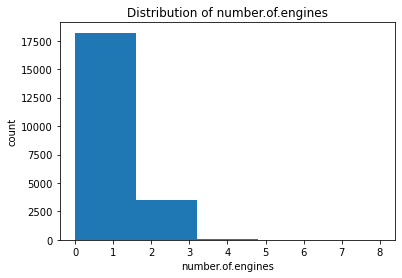

In [43]:
x_values = df_subset['number.of.engines']
fig, ax = plt.subplots()
ax.hist(x_values, bins = 5)
ax.set_xlabel('number.of.engines')
ax.set_ylabel('count')
ax.set_title('Distribution of number.of.engines')

In [44]:
df_subset['number.of.engines'].median()

1.0

In [45]:
df_subset['number.of.engines'].mean()

1.1778876980855546

From our exploratory value_counts() and histogram, we find that 1 is the median of the series, close to the mean of the series, and about the center of the histogram. Therefore, we can fill our nulls with 1 without seriously altering the distribution of data.

In [46]:
# Replacing nulls in the 'number.of.engines' column

df_subset['number.of.engines'] = df_subset['number.of.engines'].fillna(df_subset['number.of.engines'].median())

In [47]:
df_subset.isna().sum()

event.date                0
country                   0
number.of.engines         0
aircraft.damage           0
make                      0
model                     0
engine.type               0
total.fatal.injuries      0
total.minor.injuries      0
total.uninjured           0
total.serious.injuries    0
weather.condition         0
state                     0
dtype: int64

### Consolidating the serious injuries and minor injuries columns

We will combine the serious injuries and minor injuries columns so that our unit of analysis can focus on fatal vs. non-fatal injuries, as we believe this is the more important measure of safety.

In [48]:
df_subset['total.nonfatal.injuries'] = df_subset['total.minor.injuries'] + df_subset['total.serious.injuries']

In [49]:
df_subset = df_subset.drop(columns=['total.serious.injuries', 'total.minor.injuries'])

In [50]:
df_subset.head()

,event.date,country,number.of.engines,aircraft.damage,make,model,engine.type,total.fatal.injuries,total.uninjured,weather.condition,state,total.nonfatal.injuries
5,1979,United States,2.0,Substantial,Mcdonnell Douglas,DC9,Turbo Fan,0.0,44.0,VMC,MA,1.0
7,1982,United States,1.0,Substantial,Cessna,140,Reciprocating,0.0,2.0,VMC,WA,0.0
8,1982,United States,2.0,Substantial,Cessna,401B,Reciprocating,0.0,2.0,IMC,NJ,0.0
12,1982,United States,1.0,Destroyed,Bellanca,17-30A,Reciprocating,0.0,0.0,IMC,LA,1.0
13,1982,United States,1.0,Destroyed,Cessna,R172K,Reciprocating,1.0,0.0,IMC,TX,0.0


### Typecasting: Changing float columns into integer columns 

We intend to perform calculations, run code on, and create visualizations out of certain columns in the future. These will require the data type of the columns to be integers.

In [51]:
df_subset.dtypes

event.date                   int64
country                     object
number.of.engines          float64
aircraft.damage             object
make                        object
model                       object
engine.type                 object
total.fatal.injuries       float64
total.uninjured            float64
weather.condition           object
state                       object
total.nonfatal.injuries    float64
dtype: object

In [52]:
df_subset['number.of.engines'] = df_subset['number.of.engines'].astype(int)

In [53]:
df_subset['total.nonfatal.injuries'] = df_subset['total.nonfatal.injuries'].astype(int)
df_subset['total.fatal.injuries'] = df_subset['total.fatal.injuries'].astype(int)
df_subset['total.uninjured'] = df_subset['total.uninjured'].astype(int)

In [54]:
df_subset.dtypes

event.date                  int64
country                    object
number.of.engines           int64
aircraft.damage            object
make                       object
model                      object
engine.type                object
total.fatal.injuries        int64
total.uninjured             int64
weather.condition          object
state                      object
total.nonfatal.injuries     int64
dtype: object

### Calculating/creating new injuries percentage columns

In our analysis we want to normalize for the number of passengers on each aircraft during each accident. If a plane had 1 fatality but only 1 passenger, it is not fair to compare its safety to a plane with 1 fatality but 400+ passengers. To fix this issue, we will calculate 3 new columns representing the **percentage** of fatalities, non-fatalities, and uninjured passengers in each accident.

In [55]:
# Turning injury columns into percentage of total passengers
df_subset['fatal.injuries.perc'] = round(((df_subset['total.fatal.injuries'] / (df_subset['total.fatal.injuries'] + 
                                                                             df_subset['total.nonfatal.injuries'] + 
                                                                             df_subset['total.uninjured'])) * 100), 1)
df_subset['nonfatal.injuries.perc'] = round(((df_subset['total.nonfatal.injuries'] / (df_subset['total.fatal.injuries'] + 
                                                                             df_subset['total.nonfatal.injuries'] + 
                                                                             df_subset['total.uninjured'])) * 100), 1)
df_subset['uninjured.perc'] = round(((df_subset['total.uninjured'] / (df_subset['total.fatal.injuries'] + 
                                                                             df_subset['total.nonfatal.injuries'] + 
                                                                             df_subset['total.uninjured'])) * 100), 1)

Any resulting nulls in the new columns occur because there were no injuries or non-injuries reported at all, resulting in a divide by 0 error. We will replace these nulls with 0's below.

In [56]:
# Cleaning resulting nulls

df_subset.isna().sum()

df_subset['fatal.injuries.perc'].fillna(0, inplace=True)
df_subset['nonfatal.injuries.perc'].fillna(0, inplace=True)
df_subset['uninjured.perc'].fillna(0, inplace=True)

In [57]:
df_subset.isna().sum()

event.date                 0
country                    0
number.of.engines          0
aircraft.damage            0
make                       0
model                      0
engine.type                0
total.fatal.injuries       0
total.uninjured            0
weather.condition          0
state                      0
total.nonfatal.injuries    0
fatal.injuries.perc        0
nonfatal.injuries.perc     0
uninjured.perc             0
dtype: int64

In [58]:
# Checking data type of the new calculated columns

df_subset.dtypes

event.date                   int64
country                     object
number.of.engines            int64
aircraft.damage             object
make                        object
model                       object
engine.type                 object
total.fatal.injuries         int64
total.uninjured              int64
weather.condition           object
state                       object
total.nonfatal.injuries      int64
fatal.injuries.perc        float64
nonfatal.injuries.perc     float64
uninjured.perc             float64
dtype: object

In [59]:
# Turning the new injuries percentage columns into integers

df_subset['fatal.injuries.perc'] = df_subset['fatal.injuries.perc'].astype(int)
df_subset['nonfatal.injuries.perc'] = df_subset['nonfatal.injuries.perc'].astype(int)
df_subset['uninjured.perc'] = df_subset['uninjured.perc'].astype(int)

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24374 entries, 5 to 90345
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   event.date               24374 non-null  int64 
 1   country                  24374 non-null  object
 2   number.of.engines        24374 non-null  int64 
 3   aircraft.damage          24374 non-null  object
 4   make                     24374 non-null  object
 5   model                    24374 non-null  object
 6   engine.type              24374 non-null  object
 7   total.fatal.injuries     24374 non-null  int64 
 8   total.uninjured          24374 non-null  int64 
 9   weather.condition        24374 non-null  object
 10  state                    24374 non-null  object
 11  total.nonfatal.injuries  24374 non-null  int64 
 12  fatal.injuries.perc      24374 non-null  int64 
 13  nonfatal.injuries.perc   24374 non-null  int64 
 14  uninjured.perc           24374 non-nul

### Translating the aircraft damage column into a numerical scale

In order to visualize the scale of aircraft damage, we will turn the categorical 'aircraft.damage' column into a numerical scale. By creating a new column consisting of these integers, we can later run groupby's to see correlations between other columns and this one.

In [60]:
df_subset['aircraft.damage'].value_counts()

Substantial    18965
Destroyed       3129
N/A             1360
Minor            920
Name: aircraft.damage, dtype: int64

In [61]:
def aircraft_damage_numbers(y):
    if y == "Destroyed":
        return 3
    elif y == "Substantial":
        return 2
    elif y == "Minor":
        return 1
    else:
        return 0

In [62]:
df_subset['aircraft.damage.scale'] = df_subset['aircraft.damage'].map(aircraft_damage_numbers)
df_subset['aircraft.damage.scale'].value_counts()

2    18965
3     3129
0     1360
1      920
Name: aircraft.damage.scale, dtype: int64

### Cleaning the 'make' column

In [63]:
df_subset['make'].value_counts()

CESSNA                    4864
Cessna                    3567
PIPER                     2802
Piper                     1893
BOEING                    1033
                          ... 
Bell                         1
Scottish                     1
CARLO ROBERT                 1
ADAMS DENNIS ALLEN           1
FLIGHTSTAR SPORTPLANES       1
Name: make, Length: 1382, dtype: int64

Looking through the 'make' column, we find various typos. For example, some planes made by Cessna are encoded as "CESSNA", while some are encoded as "Cessna". Another examples is that some planes were encoded as "Rockwell", while some are encoded as "Rockwell international". In order to fix this, we will make all the values lower case, then define a function which fixes other naming errors in the top 50 most common airplane brands.

In [64]:
# Standardizing the capitalization of every value

df_subset['make'] = df_subset['make'].astype(str).str.lower()
pd.set_option('display.max_rows', None)
df_subset['make'].value_counts().head(50)

cessna                            8431
piper                             4695
beech                             1683
boeing                            1304
mooney                             416
bellanca                           281
grumman                            249
airbus                             243
maule                              232
aeronca                            227
air tractor                        224
cirrus design corp                 220
air tractor inc                    219
champion                           169
luscombe                           163
embraer                            153
stinson                            145
cirrus                             137
north american                     118
mcdonnell douglas                  112
taylorcraft                        110
aero commander                     106
dehavilland                         95
de havilland                        87
aviat aircraft inc                  76
socata                   

In [65]:
# Defining a function to fix the typos in the most common makes

def typos(x):
    if "air tractor" in x:
        return "air tractor"
    elif "cessna" in x:
        return "cessna"
    elif "piper" in x:
        return "piper"
    elif "beech" in x:
        return "beech"
    elif "boeing" in x:
        return "boeing"
    elif "mooney" in x:
        return "mooney"
    elif "grumman" in x:
        return "grumman"
    elif "airbus" in x:
        return "airbus"
    elif "aeronca" in x:
        return "aeronca"
    elif "cirrus" in x:
        return "cirrus"
    elif "champion" in x:
        return "american champion"
    elif "embraer" in x:
        return "embraer"
    elif "havilland" in x:
        return "dehavilland"
    elif "aviat" in x:
        return "aviat"
    elif "diamond" in x:
        return "diamond"
    elif "ercoupe" in x:
        return "ercoupe"
    elif "rockwell" in x:
        return "rockwell"
    else:
        return x

In [66]:
df_subset['make'] = df_subset['make'].map(typos)

In [67]:
df_subset['make'].value_counts().head(50)

cessna                            8489
piper                             4764
beech                             1758
boeing                            1333
mooney                             464
air tractor                        450
grumman                            425
cirrus                             401
airbus                             285
bellanca                           281
aviat                              263
american champion                  244
maule                              232
aeronca                            230
dehavilland                        183
embraer                            173
luscombe                           163
diamond                            150
stinson                            145
rockwell                           128
north american                     118
mcdonnell douglas                  112
taylorcraft                        110
aero commander                     106
ercoupe                             79
socata                   

### Defining and saving our cleaned subset

Below we are dropping the columns that we used to calculate the 4 new columns. This concludes our creation of our first subset of data.

In [68]:
df_subset = df_subset[['event.date', 'country', 'state', 'number.of.engines',
                'make', 'model', 'engine.type',  
                 'fatal.injuries.perc', 'nonfatal.injuries.perc', 'uninjured.perc', 
                'weather.condition', 'aircraft.damage.scale']]

In [69]:
df_subset.head()

,event.date,country,state,number.of.engines,make,model,engine.type,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,weather.condition,aircraft.damage.scale
5,1979,United States,MA,2,mcdonnell douglas,DC9,Turbo Fan,0,2,97,VMC,2
7,1982,United States,WA,1,cessna,140,Reciprocating,0,0,100,VMC,2
8,1982,United States,NJ,2,cessna,401B,Reciprocating,0,0,100,IMC,2
12,1982,United States,LA,1,bellanca,17-30A,Reciprocating,0,100,0,IMC,3
13,1982,United States,TX,1,cessna,R172K,Reciprocating,100,0,0,IMC,3


In [70]:
df_subset.shape

(24374, 12)

In [71]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24374 entries, 5 to 90345
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event.date              24374 non-null  int64 
 1   country                 24374 non-null  object
 2   state                   24374 non-null  object
 3   number.of.engines       24374 non-null  int64 
 4   make                    24374 non-null  object
 5   model                   24374 non-null  object
 6   engine.type             24374 non-null  object
 7   fatal.injuries.perc     24374 non-null  int64 
 8   nonfatal.injuries.perc  24374 non-null  int64 
 9   uninjured.perc          24374 non-null  int64 
 10  weather.condition       24374 non-null  object
 11  aircraft.damage.scale   24374 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.4+ MB


In [72]:
df_subset.describe()

,event.date,number.of.engines,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
count,24374.000000,24374.000000,24374.000000,24374.000000,24374.000000,24374.000000
mean,2009.485230,1.159350,16.399852,19.074957,60.801100,1.979035
std,11.499791,0.408294,36.034714,37.207320,47.748262,0.623606
min,1979.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,2012.000000,1.000000,0.000000,0.000000,100.000000,2.000000
75%,2017.000000,1.000000,0.000000,0.000000,100.000000,2.000000
max,2022.000000,8.000000,100.000000,100.000000,100.000000,3.000000


In [73]:
df_subset.to_csv('Final_Data/subset.csv')

A quick note here: we will not be re-indexing our subset(s) (another is incoming below) because we've found that doing so takes too much processing power. A step-wise index is also irrelevant to our analysis because we never call to specific accidents.

### Defining a second subset that only contains plane makes (brands) with over 100 entries

Below we will create and save a second and final subset which is a further breakdown of our first subset, created above. It will look only at airplane brands that have 100+ entries in our dataset. We are doing this because we are interested in searching for relationships between the manufacturer of an airplane and the airplane's safety features. We cannot easily do this for 983 unique manufacturers. In addition, our company is likely uninterested in purchasing planes from very small, less established, less trustworthy manufacturers. 

In [74]:
make_value_counts = df_subset['make'].value_counts()
make_value_counts.shape

(983,)

In [75]:
make_over_100 = make_value_counts.loc[make_value_counts > 100]

In [76]:
make_over_100 = list(make_over_100.index)

In [77]:
make_over_100

['cessna',
 'piper',
 'beech',
 'boeing',
 'mooney',
 'air tractor',
 'grumman',
 'cirrus',
 'airbus',
 'bellanca',
 'aviat',
 'american champion',
 'maule',
 'aeronca',
 'dehavilland',
 'embraer',
 'luscombe',
 'diamond',
 'stinson',
 'rockwell',
 'north american',
 'mcdonnell douglas',
 'taylorcraft',
 'aero commander']

In [78]:
df_subset_makes = df_subset.loc[df_subset['make'].isin(make_over_100)]
df_subset_makes.head()

,event.date,country,state,number.of.engines,make,model,engine.type,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,weather.condition,aircraft.damage.scale
5,1979,United States,MA,2,mcdonnell douglas,DC9,Turbo Fan,0,2,97,VMC,2
7,1982,United States,WA,1,cessna,140,Reciprocating,0,0,100,VMC,2
8,1982,United States,NJ,2,cessna,401B,Reciprocating,0,0,100,IMC,2
12,1982,United States,LA,1,bellanca,17-30A,Reciprocating,0,100,0,IMC,3
13,1982,United States,TX,1,cessna,R172K,Reciprocating,100,0,0,IMC,3


In [79]:
df_subset_makes.to_csv('Final_Data/df_subset_makes.csv')

In [80]:
df_subset_makes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21007 entries, 5 to 90345
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event.date              21007 non-null  int64 
 1   country                 21007 non-null  object
 2   state                   21007 non-null  object
 3   number.of.engines       21007 non-null  int64 
 4   make                    21007 non-null  object
 5   model                   21007 non-null  object
 6   engine.type             21007 non-null  object
 7   fatal.injuries.perc     21007 non-null  int64 
 8   nonfatal.injuries.perc  21007 non-null  int64 
 9   uninjured.perc          21007 non-null  int64 
 10  weather.condition       21007 non-null  object
 11  aircraft.damage.scale   21007 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.1+ MB


In [81]:
df_subset_makes.describe()

,event.date,number.of.engines,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
count,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000
mean,2009.145237,1.151331,16.041320,18.670681,61.557148,1.976817
std,11.759592,0.392003,35.693538,36.821336,47.533502,0.624247
min,1979.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,2012.000000,1.000000,0.000000,0.000000,100.000000,2.000000
75%,2017.000000,1.000000,0.000000,0.000000,100.000000,2.000000
max,2022.000000,4.000000,100.000000,100.000000,100.000000,3.000000


In [82]:
df_subset_makes.shape

(21007, 12)

This concludes our data cleaning/preparation section. We have created two datasets:

(1). df_subset contains 24.374 rows and 12 columns of interest

(2). df_subset_makes contains 21,007 rows and 12 columns of interest.

# Analysis and Results

Now that our data is cleaned, we will look for relationships between our dependent variables of interest: the three injuries percentage columns and the aircraft damage scale column. We do this below by running groupby's using every column besides these four.

In [83]:
df_subset.groupby('event.date').mean()

,number.of.engines,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
event.date,,,,,
1979,2.000000,0.000000,2.000000,97.000000,2.000000
1982,1.177883,15.606696,19.960433,64.401082,2.213054
1983,2.200000,11.500000,5.700000,82.600000,1.400000
1984,1.714286,28.571429,0.000000,71.428571,2.142857
1985,1.333333,19.333333,47.166667,33.333333,2.666667
1986,1.375000,49.000000,13.250000,37.500000,2.125000
1987,2.000000,50.000000,0.500000,49.250000,2.000000
1988,1.583333,25.000000,16.833333,57.916667,1.750000
1989,1.000000,47.571429,33.285714,19.000000,2.428571


In the above table, we find that fatalities remained high (around 30%) with some volatility through the turn of the century. Post 2002, fatalities about halve, and airplane damage slightly increases. This is consistent with increasing improvements in airplane safety technology. As such, we can recommend that our company purchase newer, 21st century planes. 

This suggestion is fairly obvious, however, as businesses are unlikely to purchase old aircraft in the first place. Therefore, it will not be one of our 3 centerpiece recommendations.

In [84]:
df_subset.groupby('country').mean()

,event.date,number.of.engines,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
country,,,,,,
Afghanistan,2012.500000,1.700000,20.000000,0.900000,38.900000,2.200000
Albania,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000
American Samoa,2022.000000,1.066667,33.333333,20.000000,20.000000,1.733333
Angola,2005.000000,1.250000,25.000000,0.000000,50.000000,2.750000
Antarctica,2011.200000,1.600000,20.000000,2.200000,57.600000,1.600000
Antigua and Barbuda,2019.000000,1.000000,0.000000,0.000000,0.000000,2.000000
Argentina,2014.913793,1.155172,29.310345,1.913793,49.724138,1.465517
Australia,2014.583893,1.255034,44.785235,4.644295,21.677852,1.389262
Austria,2013.590909,1.181818,51.863636,9.454545,20.454545,1.909091


In the groupby above, we can see that data varies widely by country. Since the amount of data points per country can also vary significantly and since there are a large number of countries in this data set, this information will not be one of our 3 centerpiece recommendations.

In [85]:
df_subset.groupby('state').mean()

,event.date,number.of.engines,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
state,,,,,,
,2013.565217,1.456522,20.239130,13.500000,55.282609,1.782609
,2022.000000,1.127907,21.168605,7.761628,36.738372,1.296512
AK,2009.746541,1.075472,7.474843,14.151572,78.215094,2.017610
AL,2007.503311,1.158940,16.801325,21.682119,61.493377,2.082781
ANTARCTICA,2007.000000,2.000000,0.000000,10.000000,90.000000,2.000000
AO,2015.062500,1.312500,59.375000,9.375000,31.125000,2.062500
AR,2007.669333,1.077333,15.269333,24.290667,60.168000,2.130667
ARGENTINA,2002.000000,1.000000,0.000000,1.000000,98.666667,2.000000
AZ,2008.621656,1.132484,11.914650,15.806369,71.363057,2.058599


In a similar vein to the country groupby, the state groupby above varies widely. Since the amount of data points per state is extremely inconsistent and since there are a large number of countries in this data set, this information will not be one of our 3 centerpiece recommendations.

In [86]:
df_subset.groupby('number.of.engines').mean()

,event.date,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
number.of.engines,,,,,
0,1996.555556,11.111111,6.555556,71.000000,1.555556
1,2009.633703,15.979942,20.591466,60.294021,2.027724
2,2008.841316,19.238027,10.748413,63.454703,1.723024
3,1998.857143,4.642857,5.660714,84.125000,1.285714
4,2007.920792,12.544554,2.336634,61.227723,1.188119
6,2022.000000,0.000000,0.000000,0.000000,2.000000
8,2019.000000,0.000000,0.000000,0.000000,2.000000


In the groupby above, we find that fatalities and damage are comparable in 1 and 2 engine planes, but are very different in all other types. However, based on the value count below, 1 and 2 engine planes are the lion's share of models. Thus, they seem to be an industry standard and we must recommend our business choose between the two. Based off of this preliminary exploration, we have decided to further  visualize this and make a recommendation in the following sections.

In [87]:
df_subset['number.of.engines'].value_counts(normalize=True)

1    0.850907
2    0.142201
4    0.004144
3    0.002298
0    0.000369
8    0.000041
6    0.000041
Name: number.of.engines, dtype: float64

In [88]:
df_subset_makes.groupby('make').mean()

,event.date,number.of.engines,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
make,,,,,,
aero commander,2007.745283,1.396226,24.528302,25.707547,48.820755,2.150943
aeronca,2009.478261,1.000000,9.273913,26.443478,64.273913,2.043478
air tractor,2012.824444,1.000000,19.333333,23.444444,56.555556,2.122222
airbus,2015.038596,1.680702,4.933333,1.807018,52.347368,0.596491
american champion,2012.229508,1.008197,14.549180,20.762295,64.684426,2.057377
aviat,2013.288973,1.072243,13.498099,22.977186,63.140684,2.019011
beech,2008.653015,1.348692,26.532992,18.350398,53.945961,2.132537
bellanca,2005.654804,1.000000,13.790036,21.530249,64.679715,2.081851
boeing,2012.672168,1.531133,3.267817,4.813953,57.411853,0.869467


In the above groupby, we can see that fatalities and aircraft damage vary significantly between brands. This revelation warrants further investigation. Based off of this preliminary exploration, we have decided to further  visualize this and make a recommendation in the following sections.

In [89]:
df_subset.groupby('engine.type').mean()

,event.date,number.of.engines,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
engine.type,,,,,,
Electric,2017.000000,3.600000,0.000000,0.000000,20.000000,2.200000
Geared Turbofan,2019.166667,1.916667,0.000000,0.000000,8.333333,0.083333
N/A,2017.117445,1.157740,26.767568,14.690663,41.529975,1.714742
Reciprocating,2007.583838,1.087539,14.242429,21.151245,64.423789,2.089726
Turbo Fan,2011.055151,2.041623,6.356920,4.629553,75.072841,1.077003
Turbo Jet,2007.196078,1.941176,18.176471,11.202614,66.555556,1.555556
Turbo Prop,2010.593985,1.382707,20.921053,16.172932,60.906767,2.022556
Turbo Shaft,2014.545455,1.272727,9.090909,27.272727,54.545455,1.727273


In the above groupby, we can see that fatalities and aircraft damage vary significantly between engine types. This revelation warrants further investigation. Based off of this preliminary exploration, we have decided to further  visualize this and make a recommendation in the following sections.

In [90]:
df_subset.groupby('weather.condition').mean()

,event.date,number.of.engines,fatal.injuries.perc,nonfatal.injuries.perc,uninjured.perc,aircraft.damage.scale
weather.condition,,,,,,
IMC,2005.512858,1.369581,53.273328,14.257899,31.587068,2.265246
N/A,2016.687668,1.254380,27.691712,8.764825,37.307615,1.501685
UNK,2006.752113,1.281690,34.518310,8.605634,42.670423,1.709859
VMC,2008.723413,1.128288,11.822346,21.150787,66.688624,2.036059


In the above groupby, we see that the type of weather differentially impacts fatalities and aircraft damage. However, the effect of weather may not be uniform across any of our other categories: engine type, engine number, or engine make. When we visualize these three categories, we will also filter for weather in order to search for a pattern. If the breakdown of weather types in accidents of each category is about similar, we can ignore weather as a confounding factor in our analysis.

### Business Recommendation 1

In the cells below, we will look at two dependent variables: the average percentage of fatalities in each accident by category, and the aircraft damage (based off of our constructed 0-3 scale). We do this in order to investigate both loss of human life and economic damage.

In [91]:
df_subset.groupby('number.of.engines')['aircraft.damage.scale', 'fatal.injuries.perc'].mean()

<ipython-input-91-9ecaeae76db8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_subset.groupby('number.of.engines')['aircraft.damage.scale', 'fatal.injuries.perc'].mean()


,aircraft.damage.scale,fatal.injuries.perc
number.of.engines,,
0,1.555556,11.111111
1,2.027724,15.979942
2,1.723024,19.238027
3,1.285714,4.642857
4,1.188119,12.544554
6,2.000000,0.000000
8,2.000000,0.000000


#### Tableau Visualization 1: Engine Type

In [92]:
%%html
<div class='tableauPlaceholder' id='viz1700242365081' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirlineProj2&#47;ofEnginesBar&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AirlineProj2&#47;ofEnginesBar' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirlineProj2&#47;ofEnginesBar&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1700242365081');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Click onto the "% of Engines" tab in the embedded Tableau visual above. You will see that planes with 3, 4, 6, and 8 engines are incredibly rare in our dataset (and in use), making up less than .7% of the data combined. That is not enough data points to make a reasonable inference from the results, as fewer data points means less reliable averages. Therefore, we will contain our analysis to the lionshare of the data: single and dual engine planes.

From this data our recommendation is as follows: single engine planes have slightly lower fatalities at about 16% of each accident whereas dual engine planes have about 19% fatalities per accident. However, single engine planes have slight more aircraft damage, inching closer to 3 ("Destroyed" damage) while dual engine planes are closer to 2 ("Substantial" damage). 

These differences can be explained via simple aeronautical mechanics. Dual engine planes are more dangerous than single engine planes, because when one engine fails the plane can quickly spin out of control. However, dual engine planes tend to be larger and therefore can take more force with less damage. 

Given the high value we place on human life, it may seem that single engine planes are preferable. However, single engine and dual engine planes have very different uses. The former is smaller, and is made for private or recreational use. The latter is larger, and tends to be made for commercial flights, which need the extra power for moving extra weight. 

Therefore, we recommend that our business buy single engine planes if they intend to enter the private, chartered flights business, and dual engine planes if they intend to enter the commercial air carrier business. This decision involves a separate analysis of overhead cost vs. maintenance cost, and more.  

### Business Recommendation 2

In [93]:
df_subset.groupby('engine.type')['aircraft.damage.scale', 'fatal.injuries.perc'].mean()

<ipython-input-93-6ec350043e64>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_subset.groupby('engine.type')['aircraft.damage.scale', 'fatal.injuries.perc'].mean()


,aircraft.damage.scale,fatal.injuries.perc
engine.type,,
Electric,2.200000,0.000000
Geared Turbofan,0.083333,0.000000
N/A,1.714742,26.767568
Reciprocating,2.089726,14.242429
Turbo Fan,1.077003,6.356920
Turbo Jet,1.555556,18.176471
Turbo Prop,2.022556,20.921053
Turbo Shaft,1.727273,9.090909


Tableau Visualization 2: Number of Engines

In [94]:
%%html
<div class='tableauPlaceholder' id='viz1700242343345' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirlineProj2&#47;TypeofEngineBar&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AirlineProj2&#47;TypeofEngineBar' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirlineProj2&#47;TypeofEngineBar&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1700242343345');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [95]:
df_subset['engine.type'].value_counts(normalize=True)

Reciprocating      0.731599
N/A                0.166981
Turbo Prop         0.054566
Turbo Fan          0.039427
Turbo Jet          0.006277
Geared Turbofan    0.000492
Turbo Shaft        0.000451
Electric           0.000205
Name: engine.type, dtype: float64

In this visualization, Electric and Geared Turbofan engines have no fatalities. This may make them seem like the obvious choice, but when we look at our value count for engine type, we can see that there are almost no data points for these categories. Therefore, we do not consider these serious options.

From this data our recommendation is as follows: Our business should purchase Turbofan engines, because they have the lowest fatalities and aircraft damage. 

### Business Recommendation 3

In [96]:
df_subset_makes.groupby('make')['aircraft.damage.scale', 'fatal.injuries.perc'].mean()

<ipython-input-96-269f3ed2dd11>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_subset_makes.groupby('make')['aircraft.damage.scale', 'fatal.injuries.perc'].mean()


,aircraft.damage.scale,fatal.injuries.perc
make,,
aero commander,2.150943,24.528302
aeronca,2.043478,9.273913
air tractor,2.122222,19.333333
airbus,0.596491,4.933333
american champion,2.057377,14.549180
aviat,2.019011,13.498099
beech,2.132537,26.532992
bellanca,2.081851,13.790036
boeing,0.869467,3.267817


Tableau Visualization 3: Aircraft Damage

In [97]:
%%html
<div class='tableauPlaceholder' id='viz1700242293198' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirlineProj2&#47;MakeTreemap&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AirlineProj2&#47;MakeTreemap' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirlineProj2&#47;MakeTreemap&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1700242293198');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

*Scroll right for the key

In this treemap, the smaller the square the lower the average percentage of fatalities from each accident. The lighter the color the less aircraft damage resulted from each accident. In other words, we are looking for the smallest squares with the lighest color. 

From this data our recommendation is as follows: Airbus, Boeing, and McDonnell Douglas are the safest and most sturdy brands of aircraft. However, McDonnell Douglas makes very few planes. Therefore, we recommend that our company focus purchases on Airbus and Boeing brand planes. These two companies are giants in the industry and trusted names in manufacturing.

Note: In the above Tableau visualizations, we have also filtered by weather condition in each category, and found an about even distribution of weather types in each category. This does not mean that weather type had no effect on accidents, but rather that the weather type's effect on accidents was about uniform. Further exploration is considered in our Next Steps section below.

## Conclusion

Our data concludes that our company's venture into the airline business should involve Airbus or Boeing turbo fan planes. These are two well-established, trustworthy, and common brands.

If our company wishes to start with a private, chartered plane business involving fewer passengers, we recommend purchasing single engine planes. If our company wishes to make a bigger investment into commercial passenger flights, we recommend purchasing dual engine planes. 

### Next Steps

While our results have been very informative to our business venture, there are more data exploration possibilities that could inform other aspects of the business. Although such questions were not within the scope of this project, a future researcher could consider adding back data that we removed from the original, full NTSB dataset in order to draw conclusions that flesh out what a safe and cost-effective aerospace business should look like.

Some examples of questions that could be answered using the available data are: the safetest area of the world to fly, whether private vs. commercial flights are safer, whether certain airports experienced greater percentages of fatalities, which phase of flight tended to be most dangerous, which type of weather condition was most dangerous, etc.

We have provided the full NTSB dataset, our two cleaned subsets, and our Tableau Dashboard in our repository. We encourage other data scientists to explore the full possibilities of research in this arena!
